# Exploratory Data Analysis Using PYSPARK and Machine Learning models

In [1]:
!python3 --version

Python 3.10.6


In [2]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.7.0
ipywidgets       : 6.0.0
jupyter_client   : 7.1.2
jupyter_core     : 4.9.1
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : 0.5.6
nbconvert        : 6.4.0
nbformat         : 5.1.3
notebook         : 6.4.8
qtconsole        : not installed
traitlets        : 5.1.1


In [2]:
pip install pyspark

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 345.2 kB/s eta 0:00:00m eta 0:00:010:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 2.5 MB/s eta 0:00:000:00:01
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845509 sha256=42a4eaf1d47c87bf716487d9df82438c83b2e30ef5a5e4821bbabeee8db64b72
  Stored in directory: /home/bigdata/.cache/pip/wheels/0f/f0/3d/517368b8ce80486e84f89f214e0a022554e4ee64969f46279b
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install findspark


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install pyspark_dist_explore

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
import findspark
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#pd.options.display.mpl_style = 'default'
import numpy as np
from pyspark.sql.types import *
from pyspark.sql import Row
import seaborn as sns
from pyspark import SparkContext
from pyspark import SQLContext
findspark.init()


from pyspark.sql import SparkSession
sc = SparkSession.builder \
     .appName("Churn data Analysis") \
     .master("local[*]") \
     .config("spark.jars","/spark-tree-plotting/*") \
     .config("spark.jars.packages", '--jars /path/to/the/spark-tree-plotting_0.2.jar') \
     .config("spark.driver.memory", '--driver-class-path /path/to/the/spark-tree-plotting_0.2.jar') \
     .getOrCreate()
    
#spark_con = SparkContext(sc=sc)
spark = SQLContext(sc)   


print("Explore the data and analysis the assignment")

22/12/05 12:47:11 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
Explore the data and analysis the assignment


In [2]:
df = spark.read.csv("/home/bigdata/TelecomCustomerAnalysis/Churn.csv", header=True, inferSchema=True)
df.printSchema()

root
 |-- AccountLength: integer (nullable = true)
 |-- VMailMessage: integer (nullable = true)
 |-- DayMins: double (nullable = true)
 |-- EveMins: double (nullable = true)
 |-- NightMins: double (nullable = true)
 |-- IntlMins: double (nullable = true)
 |-- CustServCalls: integer (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- IntlPlan: integer (nullable = true)
 |-- VMailPlan: integer (nullable = true)
 |-- DayCalls: integer (nullable = true)
 |-- DayCharge: double (nullable = true)
 |-- EveCalls: integer (nullable = true)
 |-- EveCharge: double (nullable = true)
 |-- NightCalls: integer (nullable = true)
 |-- NightCharge: double (nullable = true)
 |-- IntlCalls: integer (nullable = true)
 |-- IntlCharge: double (nullable = true)
 |-- State: string (nullable = true)
 |-- AreaCode: integer (nullable = true)
 |-- Phone: string (nullable = true)



In [3]:
df.show(5)

+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+----------+-----+--------+--------+
|AccountLength|VMailMessage|DayMins|EveMins|NightMins|IntlMins|CustServCalls|Churn|IntlPlan|VMailPlan|DayCalls|DayCharge|EveCalls|EveCharge|NightCalls|NightCharge|IntlCalls|IntlCharge|State|AreaCode|   Phone|
+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+----------+-----+--------+--------+
|          128|          25|  265.1|  197.4|    244.7|    10.0|            1|    0|       0|        1|     110|    45.07|      99|    16.78|        91|      11.01|        3|       2.7|   KS|     415|382-4657|
|          107|          26|  161.6|  195.5|    254.4|    13.7|            1|    0|       0|        1|     123|    27.47|     103|    16.62|       103|      11.45| 

In [4]:
df.columns

['AccountLength',
 'VMailMessage',
 'DayMins',
 'EveMins',
 'NightMins',
 'IntlMins',
 'CustServCalls',
 'Churn',
 'IntlPlan',
 'VMailPlan',
 'DayCalls',
 'DayCharge',
 'EveCalls',
 'EveCharge',
 'NightCalls',
 'NightCharge',
 'IntlCalls',
 'IntlCharge',
 'State',
 'AreaCode',
 'Phone']

# Account.Length: how long account has been active.

In [5]:
df.select('AccountLength').show()


#df['Churn']= df['Churn'].astype('category')
#df['Intl Plan']= df['Intl Plan'].astype('category')
#df['VMail Plan']= df['VMail Plan'].astype('category')

+-------------+
|AccountLength|
+-------------+
|          128|
|          107|
|          137|
|           84|
|           75|
|          118|
|          121|
|          147|
|          117|
|          141|
|           65|
|           74|
|          168|
|           95|
|           62|
|          161|
|           85|
|           93|
|           76|
|           73|
+-------------+
only showing top 20 rows



# The sum of all the accountlenght registered

In [58]:
df.agg({'AccountLength' : 'max'}).show()
df.agg({'AccountLength' : 'sum'}).show(truncate=False)
#df.select([max('AccountLength')]).show()

+------------------+
|max(AccountLength)|
+------------------+
|                99|
+------------------+

+------------------+
|sum(AccountLength)|
+------------------+
|336849.0          |
+------------------+



In [59]:
df.select(['Churn','IntlPlan', 'VMailPlan' ])


DataFrame[Churn: string, IntlPlan: string, VMailPlan: string]

In [6]:
from pyspark.sql.functions import col

df_schema = df.withColumn('Churn', col('Churn').cast(IntegerType())) \
          .withColumn('IntlPlan', col('IntlPlan').cast(IntegerType())) \
          .withColumn('VMailPlan', col('VMailPlan').cast(IntegerType())) \
          .withColumn('VMailMessage', col('VMailMessage').cast(IntegerType()))

df_schema.printSchema()


root
 |-- AccountLength: integer (nullable = true)
 |-- VMailMessage: integer (nullable = true)
 |-- DayMins: double (nullable = true)
 |-- EveMins: double (nullable = true)
 |-- NightMins: double (nullable = true)
 |-- IntlMins: double (nullable = true)
 |-- CustServCalls: integer (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- IntlPlan: integer (nullable = true)
 |-- VMailPlan: integer (nullable = true)
 |-- DayCalls: integer (nullable = true)
 |-- DayCharge: double (nullable = true)
 |-- EveCalls: integer (nullable = true)
 |-- EveCharge: double (nullable = true)
 |-- NightCalls: integer (nullable = true)
 |-- NightCharge: double (nullable = true)
 |-- IntlCalls: integer (nullable = true)
 |-- IntlCharge: double (nullable = true)
 |-- State: string (nullable = true)
 |-- AreaCode: integer (nullable = true)
 |-- Phone: string (nullable = true)



In [7]:
df.count()

3333

In [8]:
df_schema.describe()

DataFrame[summary: string, AccountLength: string, VMailMessage: string, DayMins: string, EveMins: string, NightMins: string, IntlMins: string, CustServCalls: string, Churn: string, IntlPlan: string, VMailPlan: string, DayCalls: string, DayCharge: string, EveCalls: string, EveCharge: string, NightCalls: string, NightCharge: string, IntlCalls: string, IntlCharge: string, State: string, AreaCode: string, Phone: string]

In [9]:
#VMail.Message: Number of voicemail messages sent by the customer.
df.select('VMailMessage').show(10)


+------------+
|VMailMessage|
+------------+
|          25|
|          26|
|           0|
|           0|
|           0|
|           0|
|          24|
|           0|
|           0|
|          37|
+------------+
only showing top 10 rows



In [10]:
#convert the column to int and calculte the totaal VMailMessage call in a row
df.agg({'VMailMessage' : 'sum'}).show()
df.agg({'VMailMessage': 'max'}).show()

+-----------------+
|sum(VMailMessage)|
+-----------------+
|            26994|
+-----------------+

+-----------------+
|max(VMailMessage)|
+-----------------+
|               51|
+-----------------+



In [65]:
#Day.Mins: Time spent on day calls.
df.select(['DayMins', 'DayCalls']).show()

+-------+--------+
|DayMins|DayCalls|
+-------+--------+
|  265.1|     110|
|  161.6|     123|
|  243.4|     114|
|  299.4|      71|
|  166.7|     113|
|  223.4|      98|
|  218.2|      88|
|    157|      79|
|  184.5|      97|
|  258.6|      84|
|  129.1|     137|
|  187.7|     127|
|  128.8|      96|
|  156.6|      88|
|  120.7|      70|
|  332.9|      67|
|  196.4|     139|
|  190.7|     114|
|  189.7|      66|
|  224.4|      90|
+-------+--------+
only showing top 20 rows



In [66]:
df.groupby('DayMins').agg({'DayCalls' : 'min'}).show()

+-------+-------------+
|DayMins|min(DayCalls)|
+-------+-------------+
|      0|            0|
|    100|           98|
|  100.1|           54|
|  100.8|          112|
|    101|           93|
|  101.1|          119|
|  101.2|          122|
|  101.4|          145|
|  101.7|          105|
|  101.9|           79|
|    102|          118|
|  102.1|           75|
|  102.3|          100|
|  102.6|           89|
|  102.7|           89|
|  102.8|          119|
|    103|          129|
|  103.1|           70|
|  103.2|          117|
|  103.3|          103|
+-------+-------------+
only showing top 20 rows



In [67]:
#Eve.Mins: Time spent on evening calls.
df.select('EveMins', 'EveCalls').show()

+-------+--------+
|EveMins|EveCalls|
+-------+--------+
|  197.4|      99|
|  195.5|     103|
|  121.2|     110|
|   61.9|      88|
|  148.3|     122|
|  220.6|     101|
|  348.5|     108|
|  103.1|      94|
|  351.6|      80|
|    222|     111|
|  228.5|      83|
|  163.4|     148|
|  104.9|      71|
|  247.6|      75|
|  307.2|      76|
|  317.8|      97|
|  280.9|      90|
|  218.2|     111|
|  212.8|      65|
|  159.5|      88|
+-------+--------+
only showing top 20 rows



# Eve.Mins: Time spent on evening calls.min, avg, max and sum

In [9]:
from pyspark.sql.functions import sum,avg,max, min, rank, col
from pyspark.sql.window import Window

df.groupby('EveMins') \
    .agg(sum('EveCalls'), 
         min('EveCalls'), 
         avg('EveCalls'), 
         max('EveCalls') \
    )\
    .show(truncate=False)

+-------+-------------+-------------+-------------+-------------+
|EveMins|sum(EveCalls)|min(EveCalls)|avg(EveCalls)|max(EveCalls)|
+-------+-------------+-------------+-------------+-------------+
|0      |0.0          |0            |0.0          |0            |
|101.3  |247.0        |111          |123.5        |136          |
|101.5  |101.0        |101          |101.0        |101          |
|102.2  |191.0        |111          |95.5         |80           |
|102.4  |110.0        |110          |110.0        |110          |
|102.6  |103.0        |103          |103.0        |103          |
|102.8  |170.0        |114          |85.0         |56           |
|103    |80.0         |80           |80.0         |80           |
|103.1  |94.0         |94           |94.0         |94           |
|103.2  |138.0        |138          |138.0        |138          |
|103.3  |99.0         |99           |99.0         |99           |
|103.4  |115.0        |115          |115.0        |115          |
|103.6  |1

In [69]:
#Night.Mins: Time spent on night calls.
df.select('NightMins', 'NightCalls').show()
df.groupby('NightMins') \
  .agg(sum('NightCalls'),
      min('NightCalls'),
      avg('NightCalls'),
      )\
.show(5)

+---------+----------+
|NightMins|NightCalls|
+---------+----------+
|    244.7|        91|
|    254.4|       103|
|    162.6|       104|
|    196.9|        89|
|    186.9|       121|
|    203.9|       118|
|    212.6|       118|
|    211.8|        96|
|    215.8|        90|
|    326.4|        97|
|    208.8|       111|
|      196|        94|
|    141.1|       128|
|    192.3|       115|
|      203|        99|
|    160.6|       128|
|     89.3|        75|
|    129.6|       121|
|    165.7|       108|
|    192.8|        74|
+---------+----------+
only showing top 20 rows



+---------+---------------+---------------+---------------+
|NightMins|sum(NightCalls)|min(NightCalls)|avg(NightCalls)|
+---------+---------------+---------------+---------------+
|    100.3|           61.0|             61|           61.0|
|    100.9|          131.0|            131|          131.0|
|    101.2|          103.0|            103|          103.0|
|    101.7|          189.0|            107|           94.5|
|    101.8|           94.0|             94|           94.0|
+---------+---------------+---------------+---------------+
only showing top 5 rows



In [70]:
df.agg({'NightCalls' : 'sum'}).show(), df.agg({'NightMins' : 'max'}).show()

+---------------+
|sum(NightCalls)|
+---------------+
|       333659.0|
+---------------+

+--------------+
|max(NightMins)|
+--------------+
|          99.3|
+--------------+



(None, None)

In [71]:
#Intl. Mins: Time spent on international calls.
df.select('IntlMins', 'IntlCalls').show(), df.agg({'IntlMins': 'sum'}).collect()


+--------+---------+
|IntlMins|IntlCalls|
+--------+---------+
|      10|        3|
|    13.7|        3|
|    12.2|        5|
|     6.6|        7|
|    10.1|        3|
|     6.3|        6|
|     7.5|        7|
|     7.1|        6|
|     8.7|        4|
|    11.2|        5|
|    12.7|        6|
|     9.1|        5|
|    11.2|        2|
|    12.3|        5|
|    13.1|        6|
|     5.4|        9|
|    13.8|        4|
|     8.1|        3|
|      10|        5|
|      13|        2|
+--------+---------+
only showing top 20 rows



(None, [Row(sum(IntlMins)=34120.89999999999)])

In [72]:
#Day.Calls: Number of day calls by customers.
df.select('DayCalls', 'CustServCalls').show()
df.groupby('CustServCalls') \
    .agg(sum('DayCalls'),
        avg('DayCalls'),
        min('DayCalls'),
        max('DayCalls'),
    
    ) \
    .show(truncate=False)

+--------+-------------+
|DayCalls|CustServCalls|
+--------+-------------+
|     110|            1|
|     123|            1|
|     114|            0|
|      71|            2|
|     113|            3|
|      98|            0|
|      88|            3|
|      79|            0|
|      97|            1|
|      84|            0|
|     137|            4|
|     127|            0|
|      96|            1|
|      88|            3|
|      70|            4|
|      67|            4|
|     139|            1|
|     114|            3|
|      66|            1|
|      90|            1|
+--------+-------------+
only showing top 20 rows

+-------------+-------------+------------------+-------------+-------------+
|CustServCalls|sum(DayCalls)|avg(DayCalls)     |min(DayCalls)|max(DayCalls)|
+-------------+-------------+------------------+-------------+-------------+
|0            |70327.0      |100.89956958393114|100          |99           |
|1            |119343.0     |101.05249788314987|0            |99  

In [73]:
#Eve.Calls: Number of evening calls by customers.
df.select('EveCalls', 'CustServCalls').show()
df.groupby('EveCalls').agg(sum('EveCalls'),
                          avg('EveCalls'))\
                        .show(truncate=False)


+--------+-------------+
|EveCalls|CustServCalls|
+--------+-------------+
|      99|            1|
|     103|            1|
|     110|            0|
|      88|            2|
|     122|            3|
|     101|            0|
|     108|            3|
|      94|            0|
|      80|            1|
|     111|            0|
|      83|            4|
|     148|            0|
|      71|            1|
|      75|            3|
|      76|            4|
|      97|            4|
|      90|            1|
|     111|            3|
|      65|            1|
|      88|            1|
+--------+-------------+
only showing top 20 rows

+--------+-------------+-------------+
|EveCalls|sum(EveCalls)|avg(EveCalls)|
+--------+-------------+-------------+
|125     |4375.0       |125.0        |
|51      |255.0        |51.0         |
|124     |2108.0       |124.0        |
|54      |270.0        |54.0         |
|155     |465.0        |155.0        |
|132     |1452.0       |132.0        |
|154     |308.0        

In [74]:
#Intl.Calls: Number of international calls.

df.select('IntlCalls').show()
df.agg({'IntlCalls': 'sum'}).show()

+---------+
|IntlCalls|
+---------+
|        3|
|        3|
|        5|
|        7|
|        3|
|        6|
|        7|
|        6|
|        4|
|        5|
|        6|
|        5|
|        2|
|        5|
|        6|
|        9|
|        4|
|        3|
|        5|
|        2|
+---------+
only showing top 20 rows

+--------------+
|sum(IntlCalls)|
+--------------+
|       14930.0|
+--------------+



In [75]:
#Night.Calls: Number of night calls by the customer.
df.select('NightCalls', 'CustServCalls').show(10)
df.agg({'NightCalls' : 'sum'}).show(truncate=False)

+----------+-------------+
|NightCalls|CustServCalls|
+----------+-------------+
|        91|            1|
|       103|            1|
|       104|            0|
|        89|            2|
|       121|            3|
|       118|            0|
|       118|            3|
|        96|            0|
|        90|            1|
|        97|            0|
+----------+-------------+
only showing top 10 rows

+---------------+
|sum(NightCalls)|
+---------------+
|333659.0       |
+---------------+



In [76]:
#Day.Charge: Charges of Day Calls.
df.select('DayCalls', 'DayCharge').show()
df.groupby('DayCharge') \
    .agg(min('DayCalls'),
         avg('DayCalls'),
         sum('DayCalls')
        )\
    .show(5)

+--------+---------+
|DayCalls|DayCharge|
+--------+---------+
|     110|    45.07|
|     123|    27.47|
|     114|    41.38|
|      71|     50.9|
|     113|    28.34|
|      98|    37.98|
|      88|    37.09|
|      79|    26.69|
|      97|    31.37|
|      84|    43.96|
|     137|    21.95|
|     127|    31.91|
|      96|     21.9|
|      88|    26.62|
|      70|    20.52|
|      67|    56.59|
|     139|    33.39|
|     114|    32.42|
|      66|    32.25|
|      90|    38.15|
+--------+---------+
only showing top 20 rows

+---------+-------------+-------------+-------------+
|DayCharge|min(DayCalls)|avg(DayCalls)|sum(DayCalls)|
+---------+-------------+-------------+-------------+
|        0|            0|          0.0|          0.0|
|     0.44|          113|        113.0|        113.0|
|     1.33|           86|         86.0|         86.0|
|     1.34|          100|        100.0|        100.0|
|       10|          104|        104.0|        104.0|
+---------+-------------+-------------

# Checking if there is a null value

In [11]:
from pyspark.sql.functions import *
col_null_cnt_df =  df.select([count(when(col(c).isNull(),c)).alias(c) for c in df.columns])

col_null_cnt_df.show()

+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+----------+-----+--------+-----+
|AccountLength|VMailMessage|DayMins|EveMins|NightMins|IntlMins|CustServCalls|Churn|IntlPlan|VMailPlan|DayCalls|DayCharge|EveCalls|EveCharge|NightCalls|NightCharge|IntlCalls|IntlCharge|State|AreaCode|Phone|
+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+----------+-----+--------+-----+
|            0|           0|      0|      0|        0|       0|            0|    0|       0|        0|       0|        0|       0|        0|         0|          0|        0|         0|    0|       0|    0|
+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+---

In [78]:
#Night.Charge: Charges of Night Calls.
df.select('NightCalls', 'NightCharge').show()
df.groupby('NightCalls').agg({'NightCharge': 'sum'}).show(5) 
     

+----------+-----------+
|NightCalls|NightCharge|
+----------+-----------+
|        91|      11.01|
|       103|      11.45|
|       104|       7.32|
|        89|       8.86|
|       121|       8.41|
|       118|       9.18|
|       118|       9.57|
|        96|       9.53|
|        90|       9.71|
|        97|      14.69|
|       111|        9.4|
|        94|       8.82|
|       128|       6.35|
|       115|       8.65|
|        99|       9.14|
|       128|       7.23|
|        75|       4.02|
|       121|       5.83|
|       108|       7.46|
|        74|       8.68|
+----------+-----------+
only showing top 20 rows

+----------+------------------+
|NightCalls|  sum(NightCharge)|
+----------+------------------+
|       125|            271.15|
|       124|            310.73|
|        51|19.560000000000002|
|        54|             14.65|
|       155|             16.85|
+----------+------------------+
only showing top 5 rows



# SQL Command with Datasets

In [3]:
df.createOrReplaceTempView('Telcom')

In [4]:
spark_df = """select * from Telcom"""

In [5]:
spark.sql(spark_df).show()

+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+----------+-----+--------+--------+
|AccountLength|VMailMessage|DayMins|EveMins|NightMins|IntlMins|CustServCalls|Churn|IntlPlan|VMailPlan|DayCalls|DayCharge|EveCalls|EveCharge|NightCalls|NightCharge|IntlCalls|IntlCharge|State|AreaCode|   Phone|
+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+----------+-----+--------+--------+
|          128|          25|  265.1|  197.4|    244.7|    10.0|            1|    0|       0|        1|     110|    45.07|      99|    16.78|        91|      11.01|        3|       2.7|   KS|     415|382-4657|
|          107|          26|  161.6|  195.5|    254.4|    13.7|            1|    0|       0|        1|     123|    27.47|     103|    16.62|       103|      11.45| 

In [82]:
sql_query = """select NightCharge, 
               NightCalls from Telcom"""
spark.sql(sql_query).show()

+-----------+----------+
|NightCharge|NightCalls|
+-----------+----------+
|      11.01|        91|
|      11.45|       103|
|       7.32|       104|
|       8.86|        89|
|       8.41|       121|
|       9.18|       118|
|       9.57|       118|
|       9.53|        96|
|       9.71|        90|
|      14.69|        97|
|        9.4|       111|
|       8.82|        94|
|       6.35|       128|
|       8.65|       115|
|       9.14|        99|
|       7.23|       128|
|       4.02|        75|
|       5.83|       121|
|       7.46|       108|
|       8.68|        74|
+-----------+----------+
only showing top 20 rows



# Night.Charge: Charges of Night Calls.

In [83]:
sql_query = """select NightCharge, 
               CASE NightCalls
                   when NightCalls then NightCharge
                   else 'calls'
               End as NightCharge,
               count(*) as NightCalls,
               round(AVG(NightCharge),2) as mean_nightcharge,
               round(AVG(NightCalls),2) as mean_nightcalls,
               SUM(NightCharge) AS sum_nightcharge,
               SUM(NightCalls) AS sum_nightcall
               from Telcom
               group by NightCharge, NightCalls
               order by 3 desc
               
"""
spark.sql(sql_query).show()


+-----------+-----------+----------+----------------+---------------+------------------+-------------+
|NightCharge|NightCharge|NightCalls|mean_nightcharge|mean_nightcalls|   sum_nightcharge|sum_nightcall|
+-----------+-----------+----------+----------------+---------------+------------------+-------------+
|       7.88|       7.88|         4|            7.88|           86.0|             31.52|        344.0|
|       9.45|       9.45|         3|            9.45|           93.0|28.349999999999998|        279.0|
|      10.49|      10.49|         3|           10.49|           96.0|             31.47|        288.0|
|       4.86|       4.86|         2|            4.86|           82.0|              9.72|        164.0|
|       9.71|       9.71|         2|            9.71|           82.0|             19.42|        164.0|
|       9.71|       9.71|         2|            9.71|           90.0|             19.42|        180.0|
|       8.15|       8.15|         2|            8.15|          101.0|    

In [84]:
#Day.Charge: Charges of Day Calls.
sql_query = """select DayCharge, 
               Case Daycalls
                   when DayCalls then DayCharge
                   else 'charge'
               end as Daycalls,
               count(*)DayCharge,
               min(DayCharge) as min_daycharge,
               max(DayCharge) as max_daycharge,
               sum(DayCharge) as sum_daycharge
               from Telcom
               group by Daycalls, DayCharge
               order by DayCharge
               
           """

spark.sql(sql_query).show()


+---------+--------+---------+-------------+-------------+-------------+
|DayCharge|Daycalls|DayCharge|min_daycharge|max_daycharge|sum_daycharge|
+---------+--------+---------+-------------+-------------+-------------+
|        0|       0|        2|            0|            0|          0.0|
|     0.44|    0.44|        1|         0.44|         0.44|         0.44|
|     1.33|    1.33|        1|         1.33|         1.33|         1.33|
|     1.34|    1.34|        1|         1.34|         1.34|         1.34|
|       10|      10|        1|           10|           10|         10.0|
|    10.01|   10.01|        2|        10.01|        10.01|        20.02|
|    10.12|   10.12|        1|        10.12|        10.12|        10.12|
|     10.2|    10.2|        1|         10.2|         10.2|         10.2|
|    10.27|   10.27|        1|        10.27|        10.27|        10.27|
|     10.3|    10.3|        1|         10.3|         10.3|         10.3|
|     10.4|    10.4|        1|         10.4|       

In [85]:
#IntlCharge: Charges of international calls..

sql_query = """select min(IntlCharge),
               Intlcalls
               from Telcom
               group by IntlCharge, IntlCalls 
               order by IntlCharge 
            """

spark.sql(sql_query).show(10)


+---------------+---------+
|min(IntlCharge)|Intlcalls|
+---------------+---------+
|              0|        0|
|            0.3|        2|
|           0.35|        6|
|           0.54|        2|
|           0.54|        7|
|           0.57|        5|
|           0.57|        4|
|           0.59|        4|
|           0.65|        3|
|           0.68|        5|
+---------------+---------+
only showing top 10 rows



In [86]:
sql_query = """select VMailPlan, VMailMessage from Telcom    
            """
spark.sql(sql_query).show(5)

+---------+------------+
|VMailPlan|VMailMessage|
+---------+------------+
|        1|          25|
|        1|          26|
|        0|           0|
|        0|           0|
|        0|           0|
+---------+------------+
only showing top 5 rows



# VMail.Plan: Voicemail plan taken by the customer or not.#UDF USER DEFINE FUNCTION

In [87]:
def vplantaken(item):
    
    return(x if x == 1 else 0 for x in item)

spark.udf.register('VoicemailPlan', vplantaken, StringType())
        
#UDF USER DEFINE FUNCTION
sql_query = """select 
               VoicemailPlan(VMailPlan) as voice_mail,
               count(*) as Voicemail
               from Telcom
               where VMailPlan = 1 and VMailPlan = 0
               group by voice_mail
               order by voice_mail
               
            """

spark.sql(sql_query).show(5)

+----------+---------+
|voice_mail|Voicemail|
+----------+---------+
+----------+---------+



In [88]:
#State: State in Area of study which have the heighest subscribers.
sql_query = """select distinct(State), AreaCode
               from Telcom
               order by AreaCode desc limit 5
               
               """

spark.sql(sql_query).show()

+-----+--------+
|State|AreaCode|
+-----+--------+
|   IL|     510|
|   TX|     510|
|   WI|     510|
|   IA|     510|
|   WY|     510|
+-----+--------+



In [89]:
#Phone: Phone number of the customer.
sql_query = """select Phone
               from Telcom
               
               
               """
spark.sql(sql_query).show(10)

+--------+
|   Phone|
+--------+
|382-4657|
|371-7191|
|358-1921|
|375-9999|
|330-6626|
|391-8027|
|355-9993|
|329-9001|
|335-4719|
|330-8173|
+--------+
only showing top 10 rows



In [90]:
#Area.Code: Area Code of the customer.

sql_query = """select AreaCode
               from Telcom
               
               
               """
spark.sql(sql_query).show(10)


+--------+
|AreaCode|
+--------+
|     415|
|     415|
|     415|
|     408|
|     415|
|     510|
|     510|
|     415|
|     408|
|     415|
+--------+
only showing top 10 rows



In [91]:

#Int.l.Plan: Does the customer have an international plan or not.
sql_query = """select IntlPlan
               from Telcom 
               WHERE IntlPlan = 1
                   
               
               """
spark.sql(sql_query).show(10)


+--------+
|IntlPlan|
+--------+
|       1|
|       1|
|       1|
|       1|
|       1|
|       1|
|       1|
|       1|
|       1|
|       1|
+--------+
only showing top 10 rows



In [92]:
#CustServ.Calls: Number of customer service calls by the customer.
sql_query = """select CustServCalls, 
               count(1) as CustService 
               from Telcom
               group by CustServCalls
               order by CustService
               """

spark.sql(sql_query).show(10)

+-------------+-----------+
|CustServCalls|CustService|
+-------------+-----------+
|            8|          2|
|            9|          2|
|            7|          9|
|            6|         22|
|            5|         66|
|            4|        166|
|            3|        429|
|            0|        697|
|            2|        759|
|            1|       1181|
+-------------+-----------+



In [17]:
#Churn: Customers who churned the telecom service or who doesn’t(0=“Churner”, 1=“ Non-Churner”) 2850 churn the network

sql_query = """select Churn, count(*) as Churners
               from Telcom
               where Churn IN (1, 0)
               GROUP BY Churn
               order by Churners
                
               
               """

spark.sql(sql_query).show()


+-----+--------+
|Churn|Churners|
+-----+--------+
|    1|     483|
|    0|    2850|
+-----+--------+



In [94]:
df_sel = df.withColumn('DayMins', col('DayMins').cast(IntegerType())) \
           .withColumn('Churn', col('Churn').cast(IntegerType()))
df_sel.printSchema()

root
 |-- AccountLength: string (nullable = true)
 |-- VMailMessage: string (nullable = true)
 |-- DayMins: integer (nullable = true)
 |-- EveMins: string (nullable = true)
 |-- NightMins: string (nullable = true)
 |-- IntlMins: string (nullable = true)
 |-- CustServCalls: string (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- IntlPlan: string (nullable = true)
 |-- VMailPlan: string (nullable = true)
 |-- DayCalls: string (nullable = true)
 |-- DayCharge: string (nullable = true)
 |-- EveCalls: string (nullable = true)
 |-- EveCharge: string (nullable = true)
 |-- NightCalls: string (nullable = true)
 |-- NightCharge: string (nullable = true)
 |-- IntlCalls: string (nullable = true)
 |-- IntlCharge: string (nullable = true)
 |-- State: string (nullable = true)
 |-- AreaCode: string (nullable = true)
 |-- Phone: string (nullable = true)



In [95]:
df.select(['DayMins', 'Churn']).show(10)

+-------+-----+
|DayMins|Churn|
+-------+-----+
|  265.1|    0|
|  161.6|    0|
|  243.4|    0|
|  299.4|    0|
|  166.7|    0|
|  223.4|    0|
|  218.2|    0|
|    157|    0|
|  184.5|    0|
|  258.6|    0|
+-------+-----+
only showing top 10 rows



In [ ]:
df = df.drop('State', 'Phone')
df.printSchema()

# LET USE RDD TO FIND EACH CORRELATION OF EACH COLUMN`

In [35]:

features = df.rdd.map(lambda row: row[0:])
from pyspark.mllib.stat import Statistics
corr_stat=Statistics.corr(features, method="pearson")

In [36]:
corr_stat

array([[ 1.00000000e+00, -4.62782433e-03,  6.21602053e-03,
        -6.75714199e-03, -8.95519186e-03,  9.51390234e-03,
        -3.79593893e-03,  1.65407422e-02,  2.47346546e-02,
         2.91840907e-03,  3.84698823e-02,  6.21413469e-03,
         1.92599670e-02, -6.74530173e-03, -1.31762751e-02,
        -8.95953455e-03,  2.06614284e-02,  9.54567480e-03,
        -1.24634967e-02],
       [-4.62782433e-03,  1.00000000e+00,  7.78274099e-04,
         1.75620343e-02,  7.68113594e-03,  2.85619588e-03,
        -1.32625831e-02, -8.97279698e-02,  8.74548591e-03,
         9.56926642e-01, -9.54806766e-03,  7.75523459e-04,
        -5.86435129e-03,  1.75777801e-02,  7.12306291e-03,
         7.66329043e-03,  1.39573387e-02,  2.88365791e-03,
        -1.99437008e-03],
       [ 6.21602053e-03,  7.78274099e-04,  1.00000000e+00,
         7.04251099e-03,  4.32336658e-03, -1.01545856e-02,
        -1.34231864e-02,  2.05150829e-01,  4.93958241e-02,
        -1.68406871e-03,  6.75041388e-03,  9.99999952e-01,
    

# Create Histogram for Day minutes spent by customers for churn=0 and 1 values.

from pyspark_dist_explore import Histogram, hist, distplot, pandas_histogram
fig, axes = plt.subplots()
hist(axes, df.groupby("DayMins", 'Churn').count().select('count'), bins=20)
axes.set_title('Day minutes spent by customers for churn')
axes.legend()
axes.set_xlabel('Total Day Minutes')
axes.set_ylabel('No. of Customers')



Text(0, 0.5, 'No. of Customers')

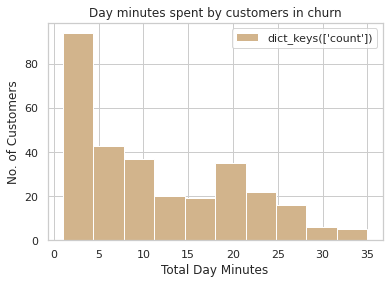

In [98]:
fig, axes = plt.subplots()
hist(axes, df.groupby("DayMins").count().select('count'), bins=10, facecolor= 'tan')
axes.set_title('Day minutes spent by customers in churn')
axes.legend()
axes.set_xlabel('Total Day Minutes')
axes.set_ylabel('No. of Customers')


# Getting the unique value from the dataframe 

In [34]:
df['Churn'].unique()    #unique()


array([0, 1])

In [35]:
df['DayMins'].nunique()

2

In [53]:
df.columns

Index(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'Churn', 'IntlPlan', 'VMailPlan',
       'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls',
       'NightCharge', 'IntlCalls', 'IntlCharge', 'AreaCode'],
      dtype='object')

# Convert the Dataframe to Pandas to perform some statistic analysis


In [8]:
df = df.toPandas()
df


,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,0,1,...,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3329,68,0,231.1,153.4,191.3,9.6,3,0,0,0,...,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3330,28,0,180.8,288.8,191.9,14.1,2,0,0,0,...,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3331,184,0,213.8,159.6,139.2,5.0,2,0,1,0,...,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381


# Data preprocessing with Pandas datatypes

In [9]:
df['Churn']= df['Churn'].astype('category')
df['Intl Plan']= df['IntlPlan'].astype('category')
df['VMail Plan']= df['VMailPlan'].astype('category')

In [10]:
df.dtypes

AccountLength       int32
VMailMessage        int32
DayMins           float64
EveMins           float64
NightMins         float64
IntlMins          float64
CustServCalls       int32
Churn            category
IntlPlan            int32
VMailPlan           int32
DayCalls            int32
DayCharge         float64
EveCalls            int32
EveCharge         float64
NightCalls          int32
NightCharge       float64
IntlCalls           int32
IntlCharge        float64
State              object
AreaCode            int32
Phone              object
Intl Plan        category
VMail Plan       category
dtype: object

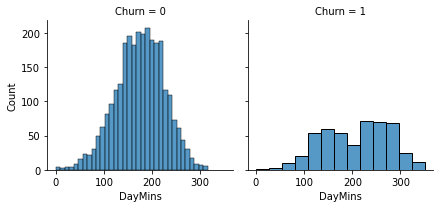

In [68]:
g = sns.FacetGrid(data=df, col='Churn', col_wrap=3)
g.map_dataframe(sns.histplot, x="DayMins")
plt.show()

#g = sns.FacetGrid(tips, col="size", height=2.5, col_wrap=3)
#g.map(sns.histplot, "total_bill")

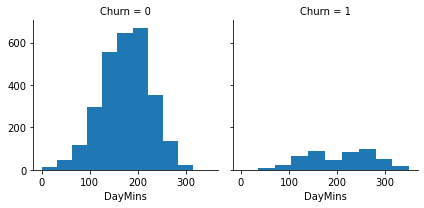

In [67]:
g = sns.FacetGrid(df, col="Churn")
g.map(plt.hist, "DayMins")

# Create count plots for Number of customers opt voicemail plan with Churn values.

In [105]:
#How to get the count of each distinct value in a column in 
sql_query = """select VMailPlan, 
               count(1) as TotalChurn 
               from Telcom 
               group by VMailPlan 
               order by TotalChurn
               """

spark.sql(sql_query).show()


+---------+----------+
|VMailPlan|TotalChurn|
+---------+----------+
|        1|       922|
|        0|      2411|
+---------+----------+



# Seaborn count plot on voicemail plan

<AxesSubplot:xlabel='VMailPlan', ylabel='count'>

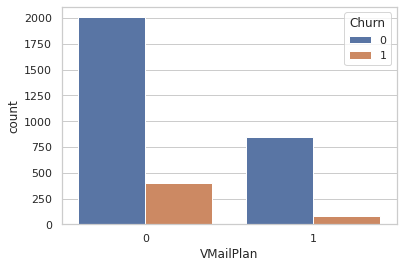

In [70]:
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)

sns.countplot(x="VMailPlan", hue="Churn", data=df)

# Create count plots for International Plan opt by the customer with Churn values.

In [55]:
df.describe()


,Churn,DayMins
count,10.000000,10.000000
mean,0.500000,0.300000
std,0.527046,0.483046
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.500000,0.000000
75%,1.000000,0.750000
max,1.000000,1.000000


# Create count plots for International Plan opt by the customer with Churn values.

In [61]:
sql_query = """select IntlPlan, 
               count(1) as nternational_Plan 
               from Telcom
               group by IntlPlan
               order by nternational_Plan
               """

spark.sql(sql_query).show()

+--------+-----------------+
|IntlPlan|nternational_Plan|
+--------+-----------------+
|       1|              323|
|       0|             3010|
+--------+-----------------+



<AxesSubplot:xlabel='IntlPlan', ylabel='count'>

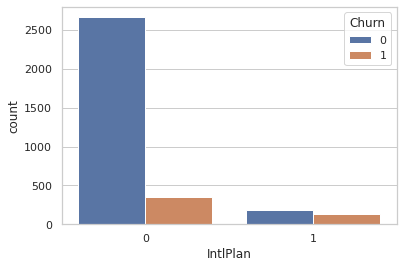

In [71]:
sns.countplot(x="IntlPlan", hue= "Churn", data=df)

# Plot Area Wise churner and non-churner.

In [18]:
df.select(['AreaCode']).show(10)

+--------+
|AreaCode|
+--------+
|     415|
|     415|
|     415|
|     408|
|     415|
|     510|
|     510|
|     415|
|     408|
|     415|
+--------+
only showing top 10 rows



+--------+
|AreaCode|
+--------+
|     415|
|     510|
|     408|
+--------+



<AxesSubplot:xlabel='AreaCode', ylabel='count'>

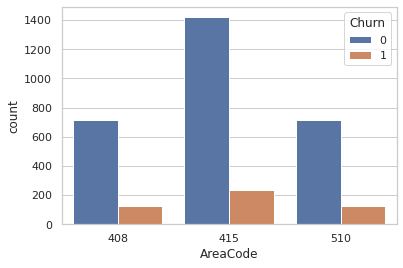

In [72]:
sql_query = """select distinct 
               AreaCode 
               from Telcom
            
               """

spark.sql(sql_query).show()
sns.countplot(x="AreaCode", hue= "Churn", data=df)

# Get correlation matrix using corr() function.

In [84]:
df.corr("IntlPlan", "Churn", method="pearson")

0.2598518473454819

In [112]:
sql_query = """select CORR(IntlPlan, AreaCode)
               from Telcom
            
               """

spark.sql(sql_query).show()

+------------------------+
|corr(IntlPlan, AreaCode)|
+------------------------+
|     0.04855051136707131|
+------------------------+



# Lets check the Correlation Matrix

In [65]:
df.corr('pearson')

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,AreaCode
AccountLength,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
VMailMessage,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
DayMins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
EveMins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
NightMins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
IntlMins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,0.045871,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServCalls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.024522,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,0.259852,-0.102148,0.018459,0.205151,0.009233,0.092786,0.006141,0.035496,-0.052844,0.068259,0.006174
IntlPlan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852,1.000000,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048551
VMailPlan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148,0.006006,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,-0.000747


# Correlation between Predicting Variable and independent variable for future analysis for customer Posibility to Churn the Network.

In [66]:
df.corr()['Churn']

AccountLength    0.016541
VMailMessage    -0.089728
DayMins          0.205151
EveMins          0.092796
NightMins        0.035493
IntlMins         0.068239
CustServCalls    0.208750
Churn            1.000000
IntlPlan         0.259852
VMailPlan       -0.102148
DayCalls         0.018459
DayCharge        0.205151
EveCalls         0.009233
EveCharge        0.092786
NightCalls       0.006141
NightCharge      0.035496
IntlCalls       -0.052844
IntlCharge       0.068259
AreaCode         0.006174
Name: Churn, dtype: float64

From the above analysis we fwe discover DayMins, CustServCalls, IntlPlan has 
high positive correlation that are predictive to Churn the network, 
while VMail Message, VMail Plan and Intl Calls has weak negative correlation. 
While remaining variables has either weak positive or negative correlation.

Strong Correlation lies in the range of ±0.5 to ±1
Weak Correlation lies in the range of ±0.1 to ±0.1
and other correlation lies within range of 0.01 to 0.006

# Applying Machine Learning Model


Create vectors of all independent variables using VectorAssembler

# Fisrts convert pandas to spark once again to apply ML models

In [30]:
# Creating the DataFrame
sprak_df = spark.createDataFrame(df)
  
# Show the DataFrame
sprak_df.show(5)


+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+----------+-----+--------+--------+---------+----------+
|AccountLength|VMailMessage|DayMins|EveMins|NightMins|IntlMins|CustServCalls|Churn|IntlPlan|VMailPlan|DayCalls|DayCharge|EveCalls|EveCharge|NightCalls|NightCharge|IntlCalls|IntlCharge|State|AreaCode|   Phone|Intl Plan|VMail Plan|
+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+----------+-----+--------+--------+---------+----------+
|          128|          25|  265.1|  197.4|    244.7|    10.0|            1|    0|       0|        1|     110|    45.07|      99|    16.78|        91|      11.01|        3|       2.7|   KS|     415|382-4657|        0|         1|
|          107|          26|  161.6|  195.5|    254.4|    13.7|            1|   

# Create vectors of all independent variables using VectorAssembler

In [13]:
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import *

from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
import sklearn.metrics as metrics


assembler = VectorAssembler(
    inputCols=['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'Churn', 'IntlPlan', 'VMailPlan',
       'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls',
       'NightCharge', 'IntlCalls', 'IntlCharge','AreaCode'],
    outputCol="features")


In [14]:
output = assembler.transform(sprak_df)

output.show(5)

22/12/05 11:30:37 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+----------+-----+--------+--------+---------+----------+--------------------+
|AccountLength|VMailMessage|DayMins|EveMins|NightMins|IntlMins|CustServCalls|Churn|IntlPlan|VMailPlan|DayCalls|DayCharge|EveCalls|EveCharge|NightCalls|NightCharge|IntlCalls|IntlCharge|State|AreaCode|   Phone|Intl Plan|VMail Plan|            features|
+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+----------+-----+--------+--------+---------+----------+--------------------+
|          128|          25|  265.1|  197.4|    244.7|    10.0|            1|    0|       0|        1|     110|    45.07|      99|    16.78|        91|      11.01|        3|       2.7|   KS|     415|382-4657|        0|         1|[128.0,25.0,265.1.

# Each independent Variables  from the Dataframe printed first 5 features

In [50]:
output.select('features').show(5) 



+--------------------+
|            features|
+--------------------+
|[128.0,25.0,265.1...|
|[107.0,26.0,161.6...|
|[137.0,0.0,243.4,...|
|[84.0,0.0,299.4,6...|
|[75.0,0.0,166.7,1...|
+--------------------+
only showing top 5 rows



# Apply Decision Tree Classifier using dependent and independent variables.

lets split the dataset into trin an test

In [15]:

from sklearn.model_selection import train_test_split 

train, test = output.randomSplit([0.8, 0.2])


# Predict the accuracy check with decision tree to understand what customer think 

I convert the table to pandas so the prediction can be clearly seen on the dataframe.
The prediction isat the endside of the table

Creating a pipeline to build the classifier.

In [16]:

treePred = DecisionTreeClassifier(featuresCol="features", labelCol='Churn')
treePred = treePred.fit(train)

pred = treePred.transform(test)
pred.toPandas()



,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,IntlCharge,State,AreaCode,Phone,Intl Plan,VMail Plan,features,rawPrediction,probability,prediction
0,6,0,226.5,152.1,164.4,9.4,3,0,0,0,...,2.54,OR,408,408-1331,0,0,"[6.0, 0.0, 226.5, 152.1, 164.4, 9.4, 3.0, 0.0,...","[2300.0, 0.0]","[1.0, 0.0]",0.0
1,11,0,143.4,289.4,194.0,9.7,2,0,0,0,...,2.62,NY,415,401-4650,0,0,"[11.0, 0.0, 143.4, 289.4, 194.0, 9.7, 2.0, 0.0...","[2300.0, 0.0]","[1.0, 0.0]",0.0
2,11,28,190.6,220.1,180.3,6.0,3,0,0,1,...,1.62,DC,415,343-1323,0,1,"[11.0, 28.0, 190.6, 220.1, 180.3, 6.0, 3.0, 0....","[2300.0, 0.0]","[1.0, 0.0]",0.0
3,11,38,209.8,196.6,233.0,7.0,1,0,0,1,...,1.89,WV,510,419-4310,0,1,"[11.0, 38.0, 209.8, 196.6, 233.0, 7.0, 1.0, 0....","[2300.0, 0.0]","[1.0, 0.0]",0.0
4,12,0,216.7,116.5,220.0,9.8,2,0,1,0,...,2.65,ND,510,379-5211,1,0,"[12.0, 0.0, 216.7, 116.5, 220.0, 9.8, 2.0, 0.0...","[2300.0, 0.0]","[1.0, 0.0]",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,184,0,213.8,159.6,139.2,5.0,2,0,1,0,...,1.35,CT,510,364-6381,1,0,"[184.0, 0.0, 213.8, 159.6, 139.2, 5.0, 2.0, 0....","[2300.0, 0.0]","[1.0, 0.0]",0.0
645,189,0,227.8,169.5,201.1,5.6,3,0,0,0,...,1.51,MS,415,411-6501,0,0,"[189.0, 0.0, 227.8, 169.5, 201.1, 5.6, 3.0, 0....","[2300.0, 0.0]","[1.0, 0.0]",0.0
646,201,0,225.9,299.1,251.3,11.2,1,1,0,0,...,3.02,TX,415,415-5476,0,0,"[201.0, 0.0, 225.9, 299.1, 251.3, 11.2, 1.0, 1...","[0.0, 384.0]","[0.0, 1.0]",1.0
647,209,0,153.7,188.6,200.8,10.7,0,0,0,0,...,2.89,NY,415,369-8703,0,0,"[209.0, 0.0, 153.7, 188.6, 200.8, 10.7, 0.0, 0...","[2300.0, 0.0]","[1.0, 0.0]",0.0


In [17]:

pred.printSchema()

root
 |-- AccountLength: long (nullable = true)
 |-- VMailMessage: long (nullable = true)
 |-- DayMins: double (nullable = true)
 |-- EveMins: double (nullable = true)
 |-- NightMins: double (nullable = true)
 |-- IntlMins: double (nullable = true)
 |-- CustServCalls: long (nullable = true)
 |-- Churn: long (nullable = true)
 |-- IntlPlan: long (nullable = true)
 |-- VMailPlan: long (nullable = true)
 |-- DayCalls: long (nullable = true)
 |-- DayCharge: double (nullable = true)
 |-- EveCalls: long (nullable = true)
 |-- EveCharge: double (nullable = true)
 |-- NightCalls: long (nullable = true)
 |-- NightCharge: double (nullable = true)
 |-- IntlCalls: long (nullable = true)
 |-- IntlCharge: double (nullable = true)
 |-- State: string (nullable = true)
 |-- AreaCode: long (nullable = true)
 |-- Phone: string (nullable = true)
 |-- Intl Plan: long (nullable = true)
 |-- VMail Plan: long (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true

# Evaluating the Model with muticlassification metrix

After going through the models, we can see the predicted test data and accuracy metrics. 
we used the function MulticlassClassificationEvaluator from pyspark to check the accuracy metrix and the confusion matrix 
can also be created using confusion_matrix function from sklearn.metrics module.

In [35]:
modelEvaluator=MulticlassClassificationEvaluator(predictionCol="prediction")
 
print("Prediction Accuracy: ")
 
x_pred=pred.select("prediction").collect()
y_orig=pred.select("Churn").collect()

commonMtrix= confusion_matrix(y_orig, x_pred)
print("Accuracy:",metrics.accuracy_score(y_orig, x_pred))
print('Precision:', metrics.precision_score(y_orig, x_pred))
print('recall:', metrics.recall_score(y_orig, x_pred))


print("Confusion Matrix:")
print(commonMtrix)





Prediction Accuracy: 


Accuracy: 1.0
Precision: 1.0
recall: 1.0
Confusion Matrix:
[[595   0]
 [  0  99]]


# Using metric classification method to alculate recall, precision, score and individual support which gives us the total sample size.

In [36]:
print(metrics.classification_report(y_orig, x_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       595
           1       1.00      1.00      1.00        99

    accuracy                           1.00       694
   macro avg       1.00      1.00      1.00       694
weighted avg       1.00      1.00      1.00       694



# Visualizing the Decision tree 

In [33]:
from spark_tree_plotting import plot_tree
from spark_tree_plotting import export_graphviz
from PIL import Image
import io
import pydotplus

png_model = plot_tree(treePred,
                       featureNames=['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
                                     'IntlMins', 'CustServCalls', 'Churn', 'IntlPlan', 'VMailPlan',
                                     'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls',
                                     'NightCharge', 'IntlCalls', 'IntlCharge','AreaCode'],
                       categoryNames={},
                       classNames=treePred.Churn,
                       filled=True,
                       roundedCorners=True,
                       roundLeaves=True)
                       
image = Image.open(io.BytesIO(png_model))
